In [1]:
# This R environment comes with many helpful analytics packages installed
# It is defined by the kaggle/rstats Docker image: https://github.com/kaggle/docker-rstats
# For example, here's a helpful package to load

library(tidyverse) # metapackage of all tidyverse packages

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

list.files(path = "../input")


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.2     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.2     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


[1] "heart-failure-prediction"

In [2]:
heart_failure <- read_csv("/kaggle/input/heart-failure-prediction/heart.csv", show_col_types = FALSE)

In [3]:
names(heart_failure)

[1] "Age"            "Sex"            "ChestPainType"  "RestingBP"     
 [5] "Cholesterol"    "FastingBS"      "RestingECG"     "MaxHR"         
 [9] "ExerciseAngina" "Oldpeak"        "ST_Slope"       "HeartDisease"

In [4]:
head(heart_failure)

Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<dbl>
40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0


In [5]:
heart_failure %>%
group_by(Age)%>%
summarize(count =n())


Age,count
<dbl>,<int>
28,1
29,3
30,1
31,2
32,5
33,2
34,7
35,11
36,6


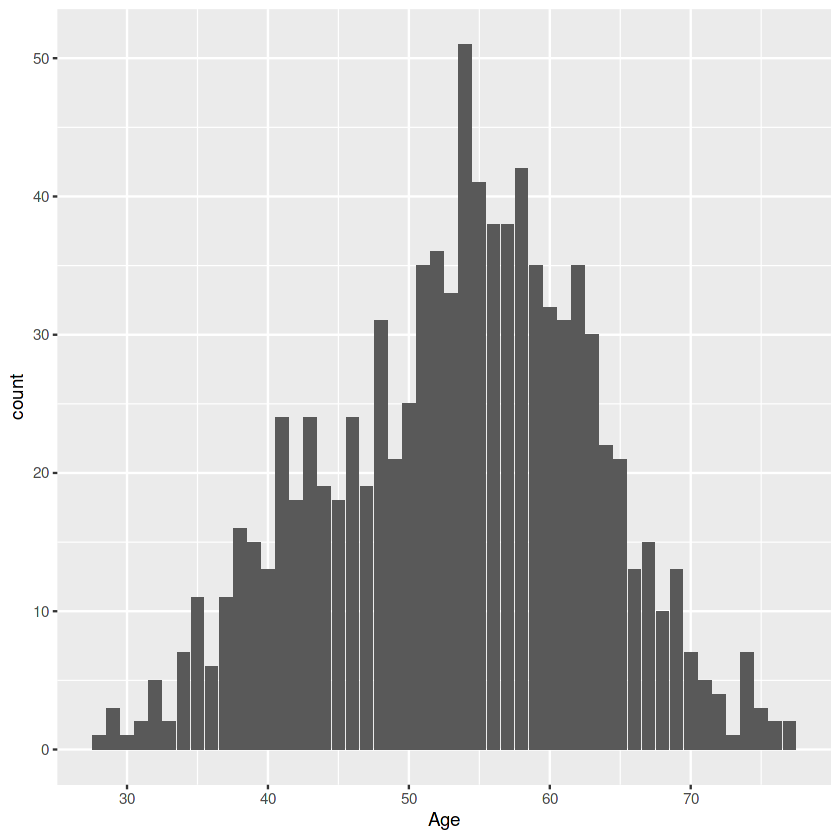

In [6]:
heart_failure %>%
group_by(Age)%>%
summarize(count =n()) %>%
ggplot() +
geom_col(aes (x=Age, y=count))


In [7]:
heart_failure %>%
group_by(Sex)%>%
summarize(count =n())


Sex,count
<chr>,<int>
F,193
M,725


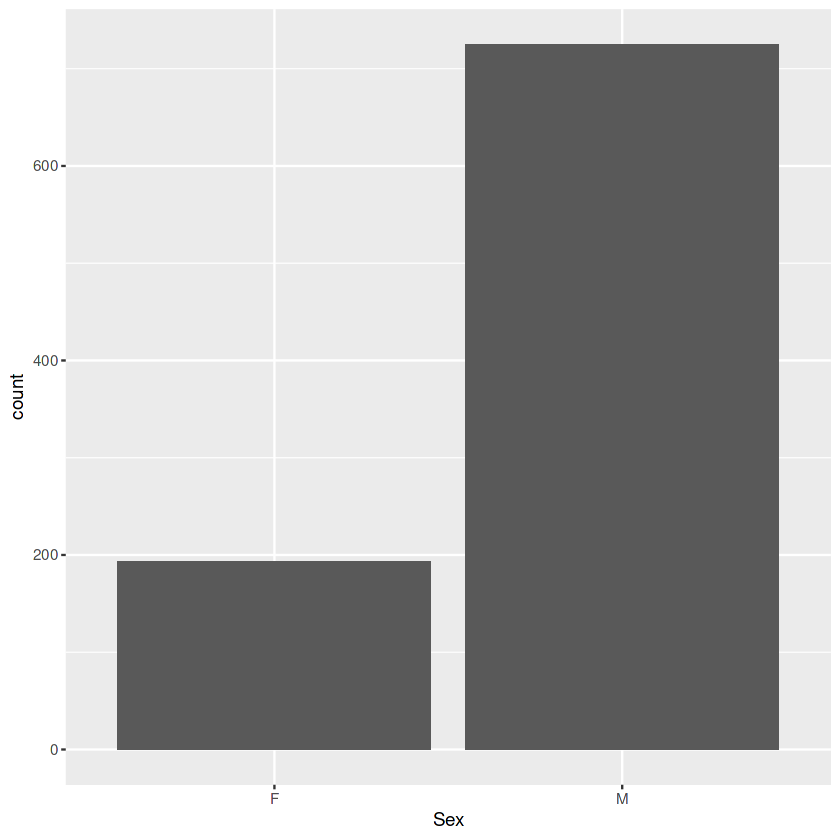

In [8]:
heart_failure %>%
group_by(Sex)%>%
summarize(count =n()) %>%
ggplot() +
geom_col(aes (x=Sex, y=count))



In [9]:
heart_failure %>%
group_by(ChestPainType)%>%
summarize(count =n())


ChestPainType,count
<chr>,<int>
ASY,496
ATA,173
NAP,203
TA,46


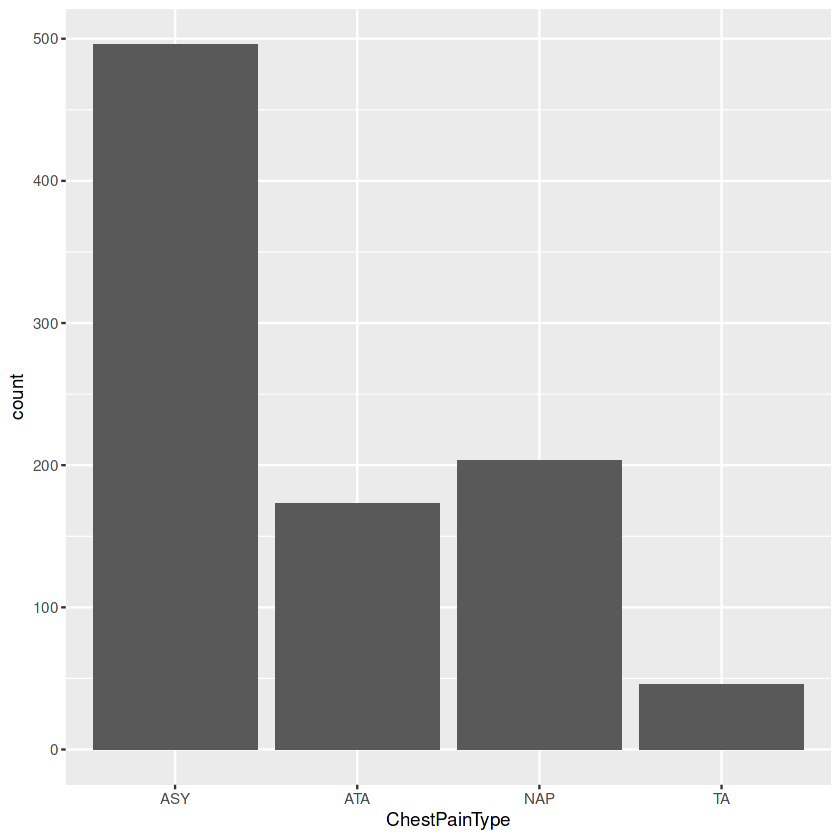

In [10]:
heart_failure %>%
group_by(ChestPainType) %>%
summarize(count =n()) %>%
ggplot() +
geom_col(aes (x=ChestPainType, y=count))

In [11]:
heart_failure %>%
group_by(RestingBP)%>%
summarize(count =n())

RestingBP,count
<dbl>,<int>
0,1
80,1
92,1
94,2
95,6
96,1
98,1
100,15
101,1


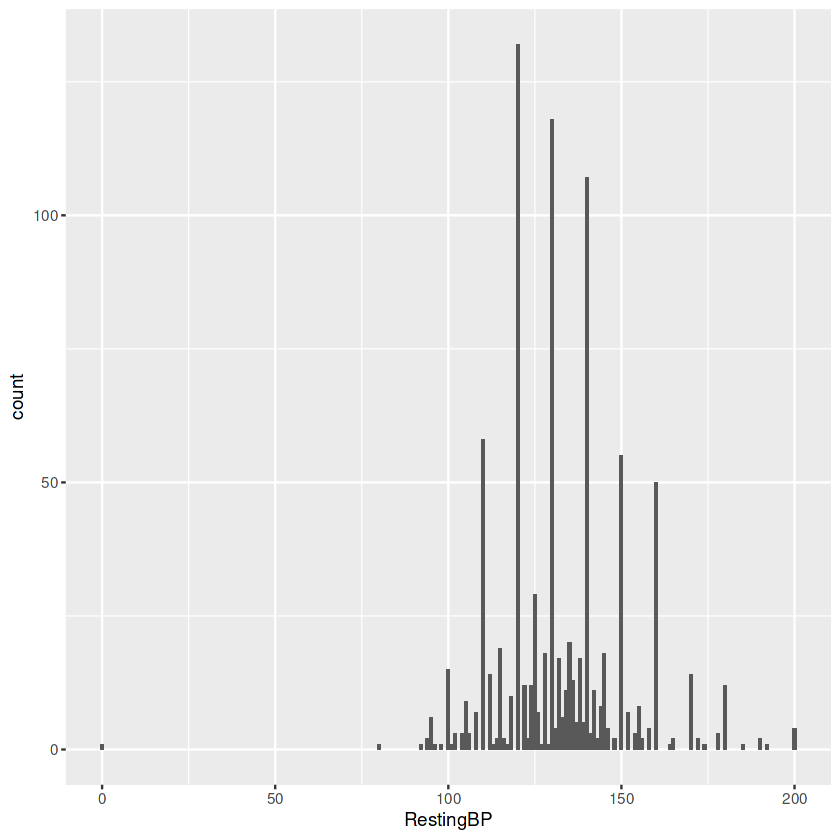

In [12]:
heart_failure %>%
group_by(RestingBP) %>%
summarize(count =n()) %>%
ggplot() +
geom_col(aes (x=RestingBP, y=count))

In [13]:
heart_failure %>%
group_by(HeartDisease)%>%
summarize(count =n())


HeartDisease,count
<dbl>,<int>
0,410
1,508


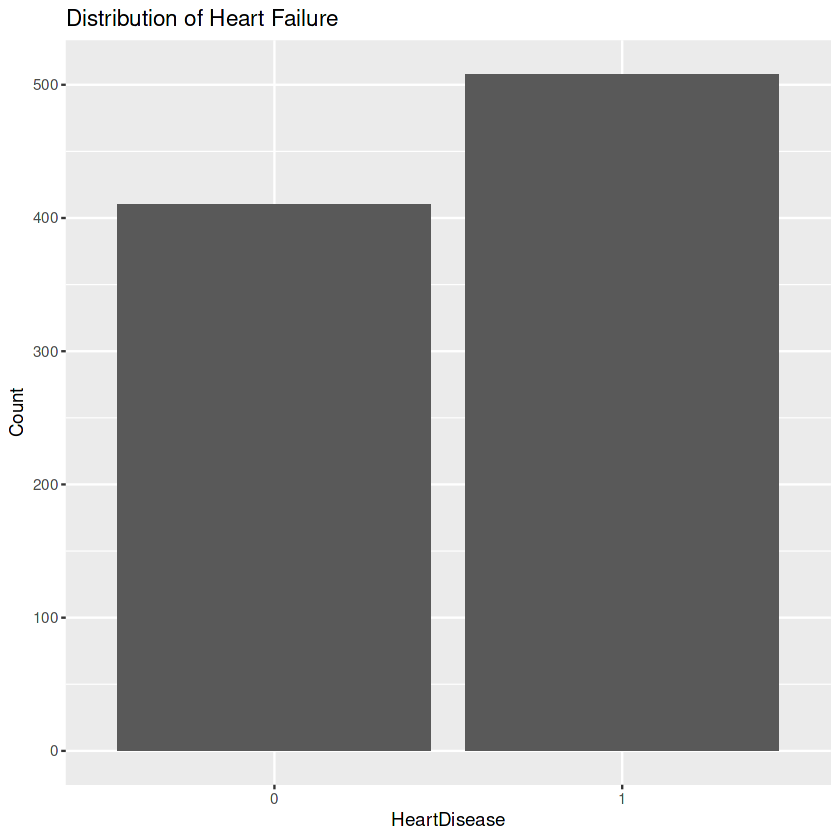

In [14]:
heart_failure %>%
group_by(HeartDisease) %>%
summarize(count = n()) %>%
ggplot() +
geom_col(aes(x = factor(HeartDisease), y = count)) +
labs(x = "HeartDisease", y = "Count") +
ggtitle("Distribution of Heart Failure")